# Table of Contents

* [Introduction](#Introduction)
* [Analysis](#Analysis)
* [Report](#Report)

# Introduction

Author: Alan Lorenzetti  
Date: 06/06/2024    

In this analysis, I explored the results for a Nanopore cDNA sequencing for the 5' RACE experiment of the putative XDP-SVA transcript.

# Analysis

## Setup

In [1]:
# 20240606 alorenzetti

# description ####
# this script will analyze
# the 5 RACE nanopore seq
# results

# setting up ####
# loading libs
packs = c(
 "tidyverse",
 "openxlsx",
 "Rsamtools",
 "GenomicAlignments",
 "foreach",
 "doParallel",
 "Biostrings",
 "pwalign",
 "data.table",
 "scales",
 "heatmaps",
 "IRdisplay"
)

lapply(packs, require, character.only = TRUE)

# setting theme
theme_set(theme_bw())

# loading ggthemes data
load("../_h/ggthemes_data.rda")
tab10_pal = ggthemes_data[["tableau"]][["color-palettes"]][["regular"]][["Tableau 10"]]
tab10_pal_colblind = ggthemes_data[["tableau"]][["color-palettes"]][["regular"]][["Color Blind"]]

# setting working directory relative to _h
if(!dir.exists("../_m")){dir.create("../_m")}
setwd("../_m/")

Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: openxlsx



Loading required package: Rsamtools



Loading required package: GenomeInfoDb



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors



Loading required package: stats4




Attaching package: ‘S4Vectors’




The following objects are masked from ‘package:lubridate’:

    second, second<-




The following objects are masked from ‘package:dplyr’:

    first, rename




The following object is masked from ‘package:tidyr’:

    expand




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following object is masked from ‘package:lubridate’:

    %within%




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




The following object is masked from ‘package:purrr’:

    reduce




Loading required package: GenomicRanges



Loading required package: Biostrings



Loading required package: XVector




Attaching package: ‘XVector’




The following object is masked from ‘package:purrr’:

    compact





Attaching package: ‘Biostrings’




The following object is masked from ‘package:base’:

    strsplit




Loading required package: GenomicAlignments



Loading required package: SummarizedExperiment



Loading required package: MatrixGenerics



Loading required package: matrixStats




Attaching package: ‘matrixStats’




The following object is masked from ‘package:dplyr’:

    count





Attaching package: ‘MatrixGenerics’




The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.





Attaching package: ‘Biobase’




The following object is masked from ‘package:MatrixGenerics’:

    rowMedians




The following objects are masked from ‘package:matrixStats’:

    anyMissing, rowMedians





Attaching package: ‘GenomicAlignments’




The following object is masked from ‘package:dplyr’:

    last




Loading required package: foreach




Attaching package: ‘foreach’




The following objects are masked from ‘package:purrr’:

    accumulate, when




Loading required package: doParallel



Loading required package: iterators



Loading required package: parallel



Loading required package: pwalign




Attaching package: ‘pwalign’




The following objects are masked from ‘package:Biostrings’:

    aligned, alignedPattern, alignedSubject, compareStrings, deletion,
    errorSubstitutionMatrices, indel, insertion, mismatchSummary,
    mismatchTable, nedit, nindel, nucleotideSubstitutionMatrix,
    pairwiseAlignment, PairwiseAlignments,
    PairwiseAlignmentsSingleSubject, pid, qualitySubstitutionMatrices,
    stringDist, unaligned, writePairwiseAlignments




Loading required package: data.table




Attaching package: ‘data.table’




The following objects are masked from ‘package:GenomicAlignments’:

    first, last, second




The following object is masked from ‘package:SummarizedExperiment’:

    shift




The following object is masked from ‘package:GenomicRanges’:

    shift




The following object is masked from ‘package:IRanges’:

    shift




The following objects are masked from ‘package:S4Vectors’:

    first, second




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




Loading required package: scales




Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




Loading required package: heatmaps




Attaching package: ‘heatmaps’




The following object is masked from ‘package:SummarizedExperiment’:

    metadata<-




The following objects are masked from ‘package:S4Vectors’:

    metadata, metadata<-




The following object is masked from ‘package:lubridate’:

    ym




The following object is masked from ‘package:base’:

    scale




Loading required package: IRdisplay



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

In [2]:
# # workaround to install new packages inside the container
# # while it is not ready
# if(!dir.exists("~/R_libs")){dir.create("~/R_libs")}
# .libPaths(c("~/R_libs", .libPaths()))
# BiocManager::install("heatmaps")

In [3]:
# defining theme pubr
# from ggpubr package
# https://github.com/kassambara/ggpubr/blob/master/R/theme_pubr.R
theme_pubr <- function (base_size = 12, base_family = "",
                        border = FALSE, margin = TRUE,
                        legend = c("top", "bottom", "left", "right", "none"),
                        x.text.angle = 0)
{
  half_line <- base_size/2
  if(!is.numeric(legend)) legend <- match.arg(legend)
  if(x.text.angle > 5) xhjust <- 1 else xhjust <- NULL

  if(border){
    panel.border <- element_rect(fill = NA, colour = "black", size = 0.7)
    axis.line <- element_blank()
  }
  else{
    panel.border <- element_blank()
    axis.line = element_line(colour = "black", size = 0.5)
  }


  if(margin)
    plot.margin <- margin(half_line, half_line, half_line,
                          half_line)
  else plot.margin <- unit(c(0.5,0.3,0.3,0.3),"mm")

  .theme <- theme_bw(base_size = base_size, base_family = base_family) %+replace%
    theme(panel.border = panel.border,
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = axis.line, axis.text = element_text(color = "black"),
          legend.key = element_blank(),
          strip.background = element_rect(fill = "#F2F2F2", colour = "black", size = 0.7),
          plot.margin = plot.margin,
          legend.position = legend,
          complete = TRUE)

  if(x.text.angle!=0)
    .theme <- .theme + theme(axis.text.x = element_text(angle = x.text.angle, hjust = xhjust))

  .theme
}

In [4]:
# setting up functions ####
# read bam files
read_bam = function(bamfile, libname, region = NULL){

    filepath = bamfile
    
    params = ScanBamParam(what = c("flag",
                                   "qname",
                                   "rname",
                                   "strand",
                                   "pos",
                                   "qwidth",
                                   "cigar",
                                   "seq",
                                   "qual",
                                   "mapq"),
                          flag = scanBamFlag(isSecondaryAlignment = F,
                                             isSupplementaryAlignment = F),
                          tag = c("qs", "dx", "RG")
                         )
    
    if(!is.null(region)){
        roi = makeGRangesFromDataFrame(df = region,
                                       ignore.strand = T)
        params = ScanBamParam(what = c("flag",
                                       "qname",
                                       "rname",
                                       "strand",
                                       "pos",
                                       "qwidth",
                                       "cigar",
                                       "seq",
                                       "qual",
                                       "mapq"),
                          which = roi,
                          flag = scanBamFlag(isSecondaryAlignment = F,
                                             isSupplementaryAlignment = F),
                          tag = c("qs", "dx", "RG")
                         )
    }
    
    bam = list()
    bam$ori = scanBam(file = filepath, param = params)
    bam$parsed = tibble(flag = bam$ori[[1]]$flag,
                        qname = bam$ori[[1]]$qname,
                        rname = bam$ori[[1]]$rname,
                        strand = bam$ori[[1]]$strand,
                        pos = bam$ori[[1]]$pos,
                        qwidth = bam$ori[[1]]$qwidth,
                        qwidth_after_softclipping = cigarWidthAlongQuerySpace(bam$ori[[1]]$cigar, after.soft.clipping = T),
                        qs_tag = bam$ori[[1]]$tag$qs,
                        dx_tag = bam$ori[[1]]$tag$dx,
                        RG_tag = bam$ori[[1]]$tag$RG,
                        seq = bam$ori[[1]]$seq %>% as.character(),
                        qual = bam$ori[[1]]$qual %>% as.character(),
                        cigar = bam$ori[[1]]$cigar,
                        mapq = bam$ori[[1]]$mapq
                       )
    
    return(bam$parsed)
}

In [5]:
# these functions will detect whether there is more
# than one hit of a string in a sequence
count_str_nhits = function(input_line, pattern, col_names){

    max_mm = round(0.2 * nchar(pattern))
    
    pw = countPattern(pattern = pattern,
                      subject = input_line$seq,
                      max.mismatch = max_mm,
                      with.indels = T,
                      algorithm = "auto")

    new = tibble(!!col_names[1] := input_line$qname,
                 !!col_names[2] := input_line$RG_tag,
                 !!col_names[3] := pw)

    return(new)
}

In [6]:
search_str_nhits = function(input_table, prefix, pattern, threads = 1){
    registerDoParallel(threads)
    
    column_names = c("qname", "RG_tag", paste0(prefix, "__", c("n_hits")))

    res = foreach(k = 1:dim(input_table)[1], .combine="c") %dopar% {
        list(
            count_str_nhits(input_line = input_table[k,],
                            pattern = pattern,
                            col_names = column_names)
        )
    }

    res = rbindlist(res)
    
    registerDoSEQ()
    
    return(res)
}

In [7]:
# this helper function will run
# a pairwise alignment and return a tibble
run_pw = function(input_line, pattern, col_names){

    pw = pwalign::pairwiseAlignment(pattern = pattern,
                                    subject = input_line$seq,
                                    type = "overlap")
    
    pat = ranges(pattern(pw))
    sub = ranges(subject(pw))

    new = tibble(!!col_names[1] := input_line$qname,
                 !!col_names[2] := input_line$RG_tag,
                 !!col_names[3] := start(sub),
                 !!col_names[4] := end(sub),
                 !!col_names[5] := width(sub)/nchar(pattern),
                 !!col_names[6] := score(pw))

    return(new)
}

In [8]:
# this function will take a table bam table with
# seqs and will search for a pattern
search_pattern = function(input_table, prefix, pattern, threads = 1){
    registerDoParallel(threads)
    
    column_names = c("qname", "RG_tag", paste0(prefix, "__", c("start", "end", "coverage", "score")))

    res = foreach(k = 1:dim(input_table)[1], .combine="c") %dopar% {
        list(
            run_pw(input_line = input_table[k,],
            pattern = pattern,
            col_names = column_names)
        )
    }

    res = rbindlist(res)
    
    registerDoSEQ()
    
    return(res)
}

## Reading and inspecting source files

In [9]:
# main code ####
# reading metadata
# metadata = read.xlsx(xlsxFile = "5_RACE_PCRs_2024_by_AMcC.xlsx")

# reading base call summary
bc_summary = read_tsv("base_called__summary.tsv")

Rows: 1419347 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): filename, read_id, run_id, barcode
dbl (8): channel, mux, start_time, duration, template_start, template_durati...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
bc_summary

filename,read_id,run_id,channel,mux,start_time,duration,template_start,template_duration,sequence_length_template,mean_qscore_template,barcode
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
channel-2.pod5,7f5c30ff-06d5-40ca-a158-0bf8f0006e45,abec48112e16db78870dfa2608a493c37f72289c,2,1,3835.59,0.3924,3835.60,0.3904,199,17,unclassified
channel-2.pod5,5d847f49-2c48-4409-a677-a6b0eb65a7f2,abec48112e16db78870dfa2608a493c37f72289c,2,1,3834.08,0.5558,3834.08,0.5538,202,13,unclassified
channel-2.pod5,9385e408-3691-49b9-b742-87f729d273b8,abec48112e16db78870dfa2608a493c37f72289c,2,1,3830.02,0.4296,3830.02,0.4276,198,15,unclassified
channel-2.pod5,a479d54a-8bf1-40f0-8faa-e7b93b512f0f,abec48112e16db78870dfa2608a493c37f72289c,2,1,3829.58,0.4366,3829.58,0.4346,208,12,unclassified
channel-2.pod5,39f19aca-7ccc-4810-8e75-696e294ad4fd,abec48112e16db78870dfa2608a493c37f72289c,2,1,3823.14,0.4852,3823.14,0.4832,217,13,unclassified
channel-2.pod5,4f5f24bb-f02f-4c55-aada-25ad98c065ab,abec48112e16db78870dfa2608a493c37f72289c,2,1,3828.19,0.4680,3828.19,0.4660,239,16,unclassified
channel-2.pod5,66d564e3-1409-46bd-b318-780e1075612a,abec48112e16db78870dfa2608a493c37f72289c,2,1,3821.87,0.8538,3821.87,0.8518,372,13,unclassified
channel-2.pod5,240658e5-fc5b-4f93-8e28-08595952cd5a,abec48112e16db78870dfa2608a493c37f72289c,2,1,3821.29,0.5264,3821.29,0.5244,219,13,unclassified
channel-2.pod5,cd989f6e-bdd7-4963-b240-b3a12a9583b1,abec48112e16db78870dfa2608a493c37f72289c,2,1,3820.37,0.3436,3820.38,0.3416,193,17,unclassified


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


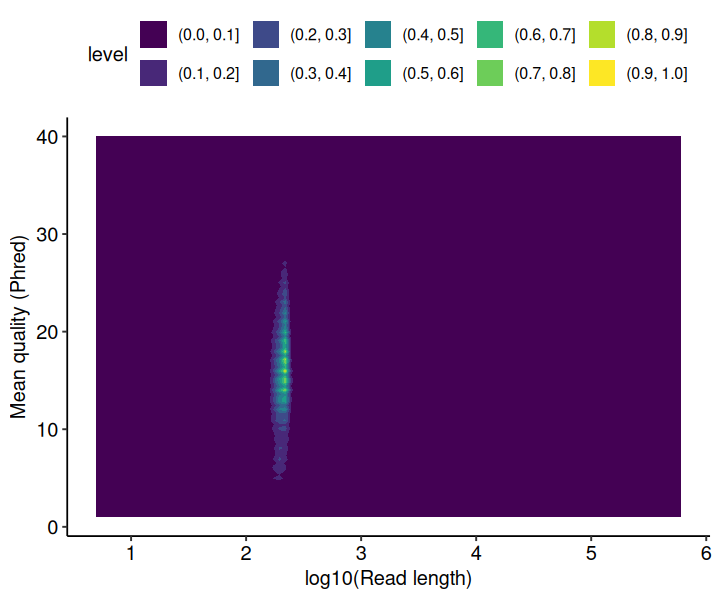

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5)
bc_summary %>%
    ggplot(aes(x = log10(sequence_length_template),
               y = mean_qscore_template)) +
    geom_density_2d_filled() +
    xlab("log10(Read length)") +
    ylab("Mean quality (Phred)") +
    theme_pubr()

In [12]:
# getting read names with Q >= 12
good_qual_reads = bc_summary %>%
    filter(mean_qscore_template >= 12) %>%
    pull(read_id)

In [13]:
# reading bam file
my_bam = "GRCh38_with_XDP_SVA__20240606_AL5RACE002__map-ont__minimap2.bam"

bam_reads = read_bam(bamfile = my_bam,
                     libname = sample,
                     region = tibble(chr = "chrX",
                                     start = 71440515-5000,
                                     end = 71443141+5000))

# filtering only the samples
# we wanna work with and filtering in
# only reads with Q >= 12
bams = list()
for(sample in unique(bam_reads$RG_tag)){
    bams[[sample]] = bam_reads %>%
        filter(RG_tag == sample) %>%
        filter(qname %in% good_qual_reads)
        
}

In [14]:
bams$`20240606_AL5RACE002`

flag,qname,rname,strand,pos,qwidth,qwidth_after_softclipping,RG_tag,seq,qual,cigar,mapq
<int>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
0,b686d2a5-b586-4411-8af0-251ef2fb041f,chrX,+,71442976,297,208,20240606_AL5RACE002,TTTTTTTTTTTTTGTACTTCGTTCAGTTACGTATTGTTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGCTATTTCATTTTTTTTTTTTCCACATCAGATGTGGAAAAAGAATGTACTGGCATTGTAATAAGGCT,"#####$$$$$$""""""""#$%((+/0/0//////22672*+)'')0@BBBAABDGFGD@A?AACDCEEFHFEFEEEFDCCCA>;<;DGHGHFEFGHJCECEGG@<9<;984+(*),*)*)))****&&&,46894=@BA?=BDH@GDGHH>:>ADGECCDDEC::>HECA@@CEA=9:>E==8>DFBA>==B@AADFMCACHHHDFDFGIEC@ACFA@@ABFB=;9623328:=A@?@ACA><;4<:ALSSSJLGD99CEDDKGHIGC?8233/3'&&%++--012ABBABA@>=753/-",89S10M5D14M2I182M,19
0,d19dc28f-5c84-477e-bb3f-f535767cb666,chrX,+,71442976,348,271,20240606_AL5RACE002,TTGTCCTGTACTTCGTTCAGTTACGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGAGAGAGGGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGTAGACCTACTTGGTTCAGTTGGTGTTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTGAGAGGGAGAGGGAGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGCTATTTCATTTTTTTTTTTCCACATCAGATGGAAAAAAAATGTACTGGCATTGTAATAA,"####$$$&)*++,,,24,,,,-4656676668;;98872/---+)))*+778ACBBBBBCDCA@@?==??;84335::894/,*))()*,0,-18477-B==>><BDGCAACEIGDDDHMDCDDEJEC@@@OB>;>==93,,,*(&##$$%%%&'++,./05533('''&+''(,.454333333334=<===GGIGGFHFAAAA@BCBBBFFFKHB:/.;:@?@A@4,+.,'&+(-01<<9::::99835???@?CCD@@>AB><<>AED?EFJIGH@?FECD>7:66669995......23321001800==11111,))0152**,--/07878:<>@==,++*(",77S10M2D1M1D17M3I37M64I1M1I17M2I67M1D21M2D30M,9
16,f4d6c430-3974-4d1e-b8e4-a6a6af3b90e8,chrX,-,71442976,221,134,20240606_AL5RACE002,AATGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGAGGCCATCATTTTCCCTTTTATCAGATGTGGAAAAAAATGTACTGCATTGTAATAAGGCTTGAGGGAGGCAGCATATGTACTGACTCAAGGTAAGAGGACAG,"(((*+993221247534425544889FEGIFLFHHFGFEJIGGHGGHIHJIIJFJCAAA59<=;?@GDDJHFHFEDE8@8..>>@22=CADB/668BD=E?<>>>CB;9((*,,-('*('&$$%%%&&')('()(&%%&225=>BB..9=8,*))))),'''14565566<=<=>==?==1157++*(('&&'%$$$#$$$$&%%&&%%$$%$$%%$%$$#",56S10M5D51M73D4M1D4M2D14M5D11M1D13M1D27M31S,1
0,c0c92636-b2dc-472d-a723-fad002f5892e,chrX,+,71442977,219,79,20240606_AL5RACE002,ATGTTTTATGTTAACCTACTAAACATAGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGGGAGAGGGAGAGGGAGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGCTATTTAGTTTTTTTTTTTCCACATCAATTAAAAAAAGAAAATGTACTGGCATTGTAATAAGGCT,")))453.,01/.*('&&%%&&'()*,***,,3779<=899DC>====>>??@;::::JNFLDEDDCDCB1///----,-<==DIHDA9<:=>@9IEFE7-4,*,5DEHFGJFGEFHGJLHHGHREGEFJJHGFHGJHFFEEC;434><<<CGEDCCCDFD544434<??CIG@1/++.-*))))''(,////../0.*('&&(-2;=???544489923",75S9M5D70M65S,1
0,10c8bf21-6671-4835-bbdd-8bfcb545c823,chrX,+,71442991,270,191,20240606_AL5RACE002,ACCTTTTTATGTAGTCTACTCATTCGTCGTCTTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAAAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGCTATTTTCGTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGC,"#$%%%%)+('''%$%%%%%%%$$%%%%%%&&'''(>BB@AADEEEDIIEFHDD21112FECCBBCECDCD64331242114201??CDCCEDC>>?><;5+()('(''*)+.0689:5232311*+216=BCEE??@ABDEFFFFHBC<@=>6<;::80,*),*))'''+--.1334415764'*-<??BADBBE:8>=><851//.-+&('''(((().22-)6=7./99)))))79988;<DB@;887=>>>ABBGLLGJ@??>??>7",79S16M3I117M7D55M,12
0,17bda126-a0d3-4207-a38e-cad865096260,chrX,+,71442991,269,194,20240606_AL5RACE002,GTGTGTGCTTGGTTCAGATTACGTATTGCTCTAATACGACTCACTATAAGGGCAAGCAGTGGTATCAACGCAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGGGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGGGAGAGCTATTTCATTTTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGCTG,###$$####$$%&(&'''%&&''*+0479;@@BDCD?????DEEFEEEECACABDGFFJGDBBBB322223BBABEDGFGLD@=?BDCB?DEGFEDFEKA@@@AJBAAABI?@BABGFGDFEE@??@CGIA?7AGFDEDEFB?@ACE@>>?@GGD>@EFDAAABH@=>>?J>>?>?IA@A@AFAAA

In [15]:
bams$`20240606_AL5RACE002`$flag %>% table()

.
     0     16 
629446 291572 

## Benchmarking time for primer detection

In [16]:
minibam = bams$`20240606_AL5RACE002` %>% head(1000)

In [17]:
# # comparing 2 threads
# start = Sys.time()

# test1 = search_pattern(input_table = minibam,
#                        prefix = "smarter_oligo",
#                        pattern = "CTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGG",
#                        threads = 2)

# end = Sys.time()
# round(end - start,2)

In [18]:
start = Sys.time()

test2 = search_pattern(input_table = minibam,
                       prefix = "smarter_oligo",
                       pattern = "CTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGG",
                       threads = 50)

end = Sys.time()
round(end - start,2)

Time difference of 17.54 secs

## Running primer detection

### Finding evidence to filter out concatamers

In [19]:
outfile = "primer_annot__xdpsvatsd_nhits_tib.tsv"
if(!file.exists(outfile)){
    # xdpsvatsd_revcomp = "CTATTTCATTTTTTTTTTTTC"
    # getting only the 5' adjacent portion for initial filtering of concatamers
    xdpsvatsd_nhits_tib = search_str_nhits(input_table = bams$`20240606_AL5RACE002`,
                                           prefix = "xdpsvatsd",
                                           pattern = "CTATTTCATTTTTTTTTTTTC",
                                           threads = 50)
    
    write_tsv(x = xdpsvatsd_nhits_tib, file = outfile)
}else{
    xdpsvatsd_nhits_tib = read_tsv(file = outfile)
}

reads_atmost1_xdpsvatsd = xdpsvatsd_nhits_tib %>%
    filter(xdpsvatsd__n_hits < 2) %>%
    pull(qname)

In [20]:
outfile = "primer_annot__smarter_nhits_tib.tsv"
if(!file.exists(outfile)){
    # smarter_oligo_fwd = "CTAATACGACTCACTATAGGG CAAGCAGTGGTATCAACGCAGAGTACATGGG"
    # getting only the 5' adjacent portion for initial filtering of concatamers
    smarter_nhits_tib = search_str_nhits(input_table = bams$`20240606_AL5RACE002`,
                                         prefix = "smarter_oligo",
                                         pattern = "CAAGCAGTGGTATCAACGCAGAGTACATGGG",
                                         threads = 50)
    
    write_tsv(x = smarter_nhits_tib, file = outfile)
}else{
    smarter_nhits_tib = read_tsv(file = outfile)
}

reads_atmost1_smarter = smarter_nhits_tib %>%
    filter(smarter_oligo__n_hits < 2) %>%
    pull(qname)

In [21]:
# filtering out reads with more than one
# smarter oligo to exclude concatamers and unexpected
# RACE products
bams$`20240606_AL5RACE002__atmost1_smarter_or_tsd` = bams$`20240606_AL5RACE002` %>%
    filter((qname %in% reads_atmost1_smarter) & (qname %in% reads_atmost1_xdpsvatsd))

### Finding expected primers and XDP-SVA TSD

In [22]:
outfile = "primer_annot__smarter_tib.tsv"
if(!file.exists(outfile)){
    # annotating where is the smarter primer on sequence
    # smarter_oligo_fwd = "CTAATACGACTCACTATAGGG CAAGCAGTGGTATCAACGCAGAGTACATGGG"
    smarter_tib = search_pattern(input_table = bams$`20240606_AL5RACE002__atmost1_smarter_or_tsd`,
                                 prefix = "smarter_oligo",
                                 pattern = "CTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGG",
                                 threads = 50)
    
    write_tsv(x = smarter_tib, file = outfile)
}else{
    smarter_tib = read_tsv(file = outfile)
}

In [23]:
outfile = "primer_annot__al5race002_tib.tsv"
if(!file.exists(outfile)){
    # annotating where is the RACE gene specific primer on sequence
    # al5race002_revcomp = "GGCATTGTAATAAGGCTTGAGGGAGGC"
    al5race002_tib = search_pattern(input_table = bams$`20240606_AL5RACE002__atmost1_smarter_or_tsd`,
                                    prefix = "AL5RACE002_revcomp",
                                    pattern = "GGCATTGTAATAAGGCTTGAGGGAGGC",
                                    threads = 50)
    
    write_tsv(x = al5race002_tib, file = outfile)
}else{
    al5race002_tib = read_tsv(file = outfile)
}

In [24]:
outfile = "primer_annot__xdpsvatsd_tib.tsv"
if(!file.exists(outfile)){
    # annotating where is the XDP-SVA TSD on sequence 
    # xdpsvatsd_revcomp = "CTATTTCATTTTTTTTTTTTC"
    xdpsvatsd_tib = search_pattern(input_table = bams$`20240606_AL5RACE002__atmost1_smarter_or_tsd`,
                                   prefix = "xdpsvatsd_revcomp",
                                   pattern = "CTATTTCATTTTTTTTTTTTC",
                                   threads = 50)
    
    write_tsv(x = xdpsvatsd_tib, file = outfile)
}else{
    xdpsvatsd_tib = read_tsv(file = outfile)
}

### Joining info about oligos with the read info

In [25]:
bam_oligo_info = left_join(x = bams$`20240606_AL5RACE002`,
                           y = smarter_tib,
                           by = c("qname", "RG_tag")) %>%
                 left_join(x = .,
                           y = smarter_nhits_tib,
                           by = c("qname", "RG_tag")) %>%
                 left_join(x = .,
                           y = xdpsvatsd_nhits_tib,
                           by = c("qname", "RG_tag")) %>%
                 left_join(x = .,
                           y = xdpsvatsd_tib,
                           by = c("qname", "RG_tag")) %>%
                 left_join(x = .,
                           y = al5race002_tib,
                           by = c("qname", "RG_tag")) %>%
                 left_join(x = .,
                           y = bc_summary %>% dplyr::select(read_id,
                                                            sequence_length_template,
                                                            mean_qscore_template),
                           by = c("qname" = "read_id"))

In [26]:
bam_oligo_info = bam_oligo_info %>%
    mutate(primer_presence_concat_check = ifelse((qname %in% reads_atmost1_smarter) & (qname %in% reads_atmost1_xdpsvatsd),
                                                  "non concatamer",
                                                  "likely concatamer")) %>%
    mutate(mean_qscore_qc = ifelse(mean_qscore_template >= 12, "pass", "fail"))

### Histogram of scores for primers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 280314 rows containing non-finite outside the scale range
(`stat_bin()`).”


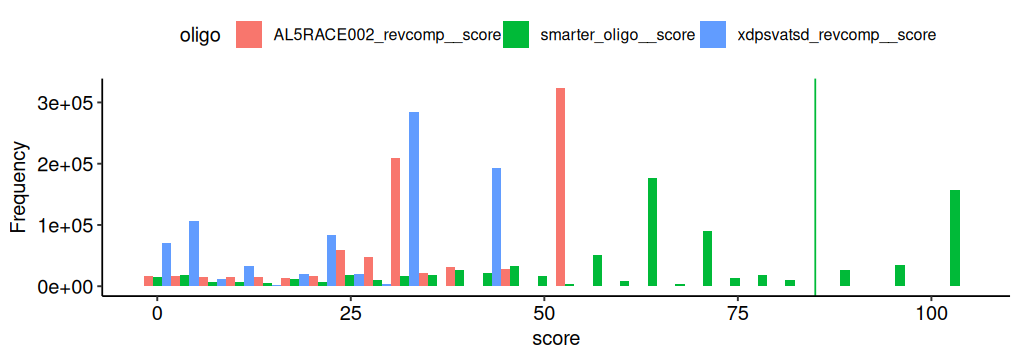

In [27]:
options(repr.plot.width = 8.5, repr.plot.height = 3)
bam_oligo_info %>%
    pivot_longer(cols = ends_with("score"), names_to = "oligo", values_to = "score") %>%
    ggplot(aes(x = score, fill = oligo)) +
    geom_histogram(position = "dodge") +
    geom_vline(xintercept = 85, color = "#00BA38") +
    theme_pubr() +
    ylab("Frequency")

### Histogram of coverage for primers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 280314 rows containing non-finite outside the scale range
(`stat_bin()`).”


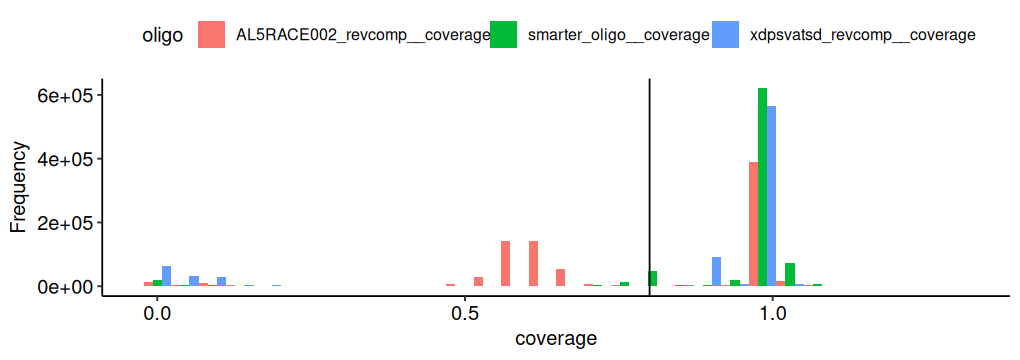

In [28]:
options(repr.plot.width = 8.5, repr.plot.height = 3)
bam_oligo_info %>%
    pivot_longer(cols = ends_with("coverage"), names_to = "oligo", values_to = "coverage") %>%
    ggplot(aes(x = coverage, fill = oligo)) +
    geom_histogram(position = "dodge") +
    geom_vline(xintercept = 0.8) +
    theme_pubr() +
    ylab("Frequency")

### Histogram of MAPQ

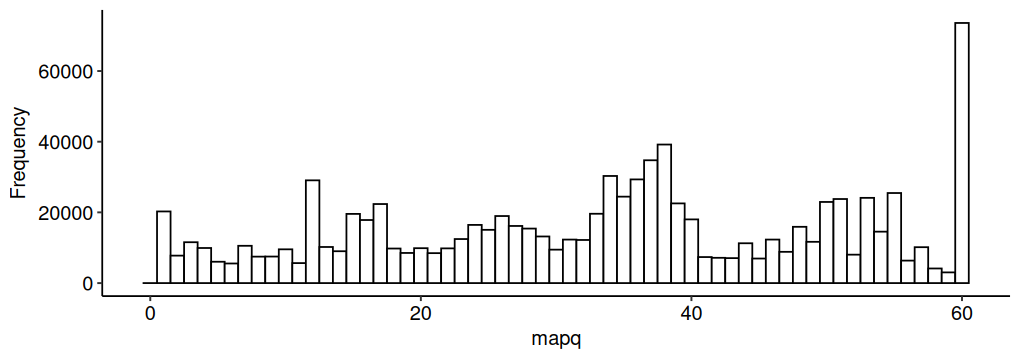

In [29]:
options(repr.plot.width = 8.5, repr.plot.height = 3)
bam_oligo_info %>%
    ggplot(aes(x = mapq)) +
    geom_histogram(fill = "white", color = "black", binwidth = 1) +
    theme_pubr() +
    ylab("Frequency")

In [30]:
# filtering out based on coverage of oligos
good_primer_cov_reads = bam_oligo_info %>%
    filter(if_all(.cols = ends_with("coverage"), .fns = ~ .x >= 0.8)) %>%
    filter(smarter_oligo__score >= 85) %>%
    # filter(mapq == 60) %>%
    pull(qname)
bam_oligo_info = bam_oligo_info %>%
    mutate(primer_coverage_qc = ifelse(qname %in% good_primer_cov_reads,
                                       "good coverage of primers",
                                       "insufficient coverage of primers"))

## Extracting hexamer sequences and checking the AG content and hexamer size

In [31]:
# seq_between_hex_and_oligo = "CTATTTCATTTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACT"
bam_oligo_info = bam_oligo_info %>%
    mutate(hexamer_left = smarter_oligo__end+1,
           hexamer_right = xdpsvatsd_revcomp__start-1,
           size_of_hexamer = hexamer_right - hexamer_left + 1,
           hexamer_seq = str_sub(seq, start = hexamer_left, end = hexamer_right),
           hexamer_qual = str_sub(qual, start = hexamer_left, end = hexamer_right)) %>%
    mutate(hexamer_seq = case_when(is.na(hexamer_seq) ~ "",
                                   TRUE ~ hexamer_seq),
           hexamer_qual = case_when(is.na(hexamer_qual) ~ "",
                                   TRUE ~ hexamer_qual)) %>%
    mutate(
           AG_hex_content = ifelse(
               !is.na(hexamer_seq),
               letterFrequency(DNAStringSet(hexamer_seq), "AG", as.prob = T) %>% as.numeric(),
               NA_real_),
           CT_hex_content = ifelse(
               !is.na(hexamer_seq),
               letterFrequency(DNAStringSet(hexamer_seq), "CT", as.prob = T) %>% as.numeric(),
               NA_real_),
           A_hex_content = ifelse(
               !is.na(hexamer_seq),
               letterFrequency(DNAStringSet(hexamer_seq), "A", as.prob = T) %>% as.numeric(),
               NA_real_),
           G_hex_content = ifelse(
               !is.na(hexamer_seq),
               letterFrequency(DNAStringSet(hexamer_seq), "G", as.prob = T) %>% as.numeric(),
               NA_real_),
          ) %>%
    mutate(AG_based_concat_check = case_when(AG_hex_content >= 0.95 ~ "non concatamer",
                                             AG_hex_content < 0.95 ~ "likely concatamer",
                                             TRUE ~ "likely concatamer"))

write_tsv(file = "results_unfilt__331092G_XDP_d120__q12_cov08.tsv", x = bam_oligo_info)

In [32]:
# filtering out potential concatamers
bam_oligo_info_filt = bam_oligo_info %>%
    filter(primer_presence_concat_check == "non concatamer") %>%
    filter(primer_coverage_qc == "good coverage of primers") %>%
    filter(AG_based_concat_check == "non concatamer")

write_tsv(file = "results_filt__331092G_XDP_d120__q12_cov08.tsv", x = bam_oligo_info_filt)

### Checking size of hexamer sequences

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


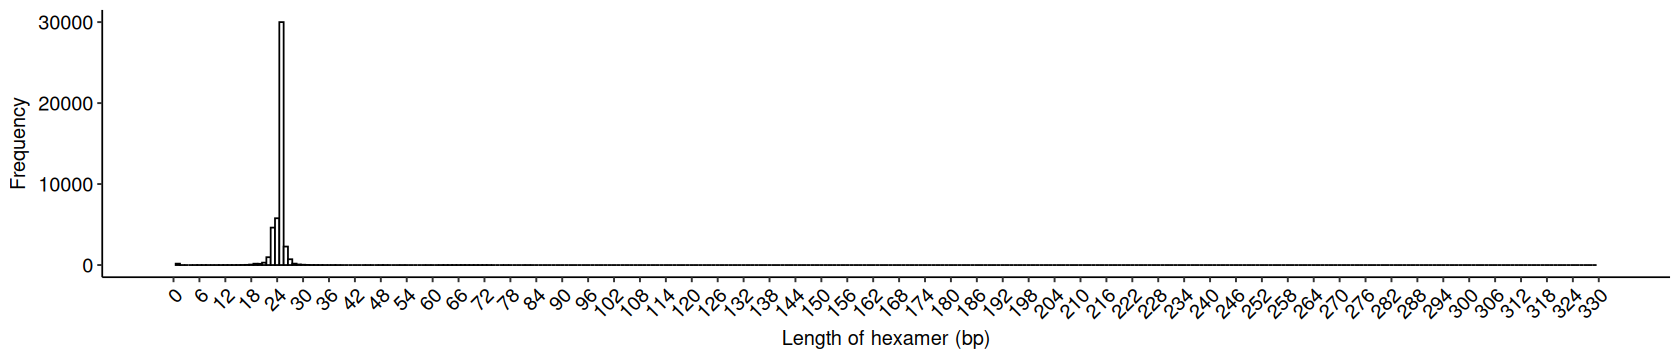

In [33]:
options(repr.plot.width = 14, repr.plot.height = 3)
bam_oligo_info_filt %>%
    ggplot(aes(x = size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, fill = "white", color = "black") +
    scale_x_continuous(breaks = seq(0, 330, by = 6), limits = c(0, 330)) +
    xlab("Length of hexamer (bp)") +
    ylab("Frequency") +
    theme_pubr(x.text.angle = 45)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


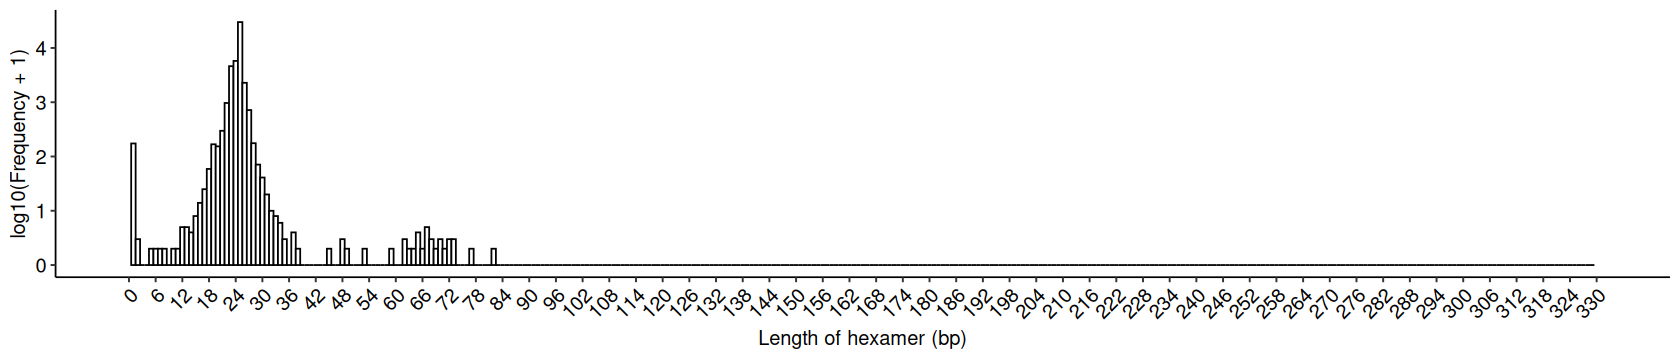

In [34]:
options(repr.plot.width = 14, repr.plot.height = 3)
bam_oligo_info_filt %>%
    ggplot(aes(x = size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, fill = "white", color = "black",
                   aes(y = log10(after_stat(count) + 1))) +
    scale_x_continuous(breaks = seq(0, 330, by = 6), limits = c(0, 330)) +
    xlab("Length of hexamer (bp)") +
    ylab("log10(Frequency + 1)") +
    theme_pubr(x.text.angle = 45)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 3)
bam_oligo_info_filt %>%
    ggplot(aes(x = -size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, fill = "white", color = "black") +
    scale_x_continuous(breaks = seq(-330, 0, by = 6), limits = c(-330, 0),
                       labels = abs(seq(-330, 0, by = 6)/6)) +
    xlab("(AGAGGG)n") +
    ylab("Frequency") +
    theme_pubr(x.text.angle = 45)

In [ ]:
options(repr.plot.width = 10.5, repr.plot.height = 3)
max_len = max(bam_oligo_info_filt$size_of_hexamer)
x_max = ceiling(max_len/6)*6 

long_gagagg = rep(c("G", "A", "G", "A", "G", "G"), 100)
long_gagagg = long_gagagg[-length(long_gagagg)]
long_gagagg = long_gagagg[(length(long_gagagg)-x_max+1):length(long_gagagg)]
long_gagagg = c(long_gagagg, "C")

colors_seq = case_when(long_gagagg == "A" ~ "#59A14F",
                       long_gagagg == "C" ~ "#4E79A7",
                       long_gagagg == "G" ~ "#F28E2B",
                       long_gagagg == "T" ~ "#E15759",
                       TRUE ~ NA_character_)

colors_seq = ifelse(colors_seq == "C", "#4E79A7", colors_seq)

seq_data = data.frame(
  x = seq(-ceiling(max_len/6)*6, 0, by = 1),
  y = rep(-0, length(seq(-ceiling(max_len/6)*6, 0, by = 1))),  # Position below the x-axis
  text = long_gagagg,
  color = colors_seq
)

hist_of_hex_length = bam_oligo_info_filt %>%
    ggplot(aes(x = -size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, width = 1, fill = "#7b848f",
                   aes(y = log10(after_stat(count) + 1))) +
    scale_x_continuous(breaks = seq(-ceiling(max_len/6)*6, 0, by = 2),
                       labels = seq(-ceiling(max_len/6)*6, 0, by = 2)) +
    xlab("Length (bp)") +
    ylab("log10(Frequency + 1)") +
    theme_pubr(x.text.angle = 45) + 
    geom_tile(data = seq_data, aes(x = x, y = y, fill = color), width = 1, height = 0.4) +
    geom_text(data = seq_data, aes(x = x, y = y, label = text), color = "white") +
    scale_fill_identity() +
    labs(title = "XDP 33109.2G d120")

ggsave(filename = "5RACE_hexlength_331092G_XDP_d120__q12_cov08__log10freq.pdf",
       plot = hist_of_hex_length,
       width = 10.5,
       height = 3,
       units = "in",
       dpi = 600)

hist_of_hex_length

In [ ]:
options(repr.plot.width = 10.5, repr.plot.height = 3)
max_len = max(bam_oligo_info_filt$size_of_hexamer)

hist_of_hex_length = bam_oligo_info_filt %>%
    ggplot(aes(x = -size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, width = 1, fill = "#7b848f") +
    scale_x_continuous(breaks = seq(-ceiling(max_len/6)*6, 0, by = 2),
                       labels = seq(-ceiling(max_len/6)*6, 0, by = 2)) +
    xlab("Coordinate (bp)") +
    ylab("Frequency") +
    theme_pubr(x.text.angle = 45) + 
    geom_tile(data = seq_data, aes(x = x, y = y-2400, fill = color), width = 1, height = 2400) +
    geom_text(data = seq_data, aes(x = x, y = y-2400, label = text), color = "white") +
    scale_fill_identity() +
    labs(title = "XDP 33109.2G d120")

ggsave(filename = "5RACE_hexlength_331092G_XDP_d120__q12_cov08__freq.pdf",
       plot = hist_of_hex_length,
       width = 10.5,
       height = 3,
       units = "in",
       dpi = 600)

hist_of_hex_length

In [38]:
(bam_oligo_info_filt$size_of_hexamer * -1) %>% table()

.
  -82   -77   -73   -72   -71   -70   -69   -68   -67   -66   -65   -64   -63 
    1     1     2     2     1     2     1     2     4     1     3     1     1 
  -62   -59   -53   -49   -48   -45   -38   -37   -35   -34   -33   -32   -31 
    2     1     1     1     2     1     1     3     2     5     7     9    19 
  -30   -29   -28   -27   -26   -25   -24   -23   -22   -21   -20   -19   -18 
   40    70   175   717  2283 29996  5779  4623   969   297   153   167    58 
  -17   -16   -15   -14   -13   -12   -11   -10    -8    -7    -6    -5    -2 
   24    13     7     3     4     4     1     1     1     1     1     1     2 
   -1 
  173 

In [39]:
bam_oligo_info_filt$size_of_hexamer %>% table()

.
    1     2     5     6     7     8    10    11    12    13    14    15    16 
  173     2     1     1     1     1     1     1     4     4     3     7    13 
   17    18    19    20    21    22    23    24    25    26    27    28    29 
   24    58   167   153   297   969  4623  5779 29996  2283   717   175    70 
   30    31    32    33    34    35    37    38    45    48    49    53    59 
   40    19     9     7     5     2     3     1     1     2     1     1     1 
   62    63    64    65    66    67    68    69    70    71    72    73    77 
    2     1     1     3     1     4     2     1     2     1     2     2     1 
   82 
    1 

In [40]:
set.seed(667)
for(i in c(1, 25)){
    print(i)
    tmpobj = bam_oligo_info_filt %>%
        filter(size_of_hexamer == i) %>%
        select(qname, seq, hexamer_seq, mapq) %>%
        .[sample(x = 1:100, 5),]
    print(paste(tmpobj$seq, tmpobj$hexamer_seq))
}

[1] 1
[1] "TGTATTGTCCTGTACTTCGTTCAGTTACGTATACTAATACGACTCGCTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGGACTTGGCATTTTTCTTTTTTCAATTAAAAACATTTTCTTGCTCTCGGTCTTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGCTTGAGGGAGGCAGCAATACGGTT A"     
[2] "TGTTTATGTGTAACGTACTTCGTTCAGTTACGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATGAACGCAGAGTACATGGGACTTGGCATTTTTCTTTTTTCAAATTAAAAACATTTGTCTTGCTCTCGGTCTTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGCTTGAGGGAGGCAATTGGTTA A"
[3] "TATGTAACTACTTGGTTCCAGTTAGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGGACTTGGCATTTTTCTTTTTTCAATTAAAAACATTTTCTTGCTCTCGGTCTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGCTTGAGGGAGGCAGCAATACGTT A"        
[4] "TGTTATGGTGGCACCTCGTTCAGTTACGTATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGGACTTGGCATTTTTCTTTTTTCAATTGGAAAACAGTTTCTTGCTCTCGGTCTTTTTTTTTTCCCACATCAGATGTGGAAAAAAAAATGTACTGGCATTGTAATAAGGCTTGAGGGAGGCAGCAATACGTAA A" 
[5] "CCATTGCTCTAATACGACTCACTATAGGGCAAGCAGTGGTATCAACGCAGAGTACATGGGACTTGGCATTTTTTTTTTTTT

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)
bam_oligo_info_filt %>%
    ggplot(aes(x = size_of_hexamer, y = A_hex_content)) +
    geom_point(alpha = 0.2) +
    scale_x_continuous(breaks = seq(0, 330, by = 6), limits = c(0, 330)) +
    xlab("size_of_hexamer_bp") +
    theme_pubr(x.text.angle = 45)

## Checking step-by-step read elimination

In [42]:
# base call reads
basecalled_reads = bc_summary$read_id %>% unique() %>% length()

In [43]:
# reads aligned in DNA mode
# no-splicing here as we need it simple
bam_all = read_bam(bamfile = my_bam, libname = sample)

In [44]:
# bam_all %>% dim()
aligned = bam_all %>% filter(flag != 4) %>% pull(qname) %>% unique() %>% length()
unaligned = bam_all %>% filter(flag == 4) %>% pull(qname) %>% unique() %>% length()

In [45]:
# align reads to xdp ref genome and get only those
# aligning to the XDP-SVA region start-5000 and end+5000
# keep only primary alignments
aligned_to_roi = bam_reads$qname %>% unique() %>% length()

In [46]:
# only good quality reads aligning to target
aligned_to_roi_pass = bams$`20240606_AL5RACE002` %>% pull(qname) %>% unique() %>% length

In [47]:
bam_oligo_info %>%
    group_by(primer_presence_concat_check, primer_coverage_qc, AG_based_concat_check) %>%
    summarise(n = n())

`summarise()` has grouped output by 'primer_presence_concat_check',
'primer_coverage_qc'. You can override using the `.groups` argument.


primer_presence_concat_check,primer_coverage_qc,AG_based_concat_check,n
<chr>,<chr>,<chr>,<int>
likely concatamer,insufficient coverage of primers,likely concatamer,93438
non concatamer,good coverage of primers,likely concatamer,15883
non concatamer,good coverage of primers,non concatamer,45639
non concatamer,insufficient coverage of primers,likely concatamer,206945
non concatamer,insufficient coverage of primers,non concatamer,559113


In [48]:
primer_presence_pass = bam_oligo_info %>%
    filter(primer_presence_concat_check == "non concatamer") %>%
    pull(qname) %>%
    unique() %>%
    length()

In [49]:
primer_coverage_pass = bam_oligo_info %>%
    filter(primer_presence_concat_check == "non concatamer") %>%
    filter(primer_coverage_qc == "good coverage of primers") %>%
    pull(qname) %>%
    unique() %>%
    length()

In [50]:
expected_hexamer_captured = bam_oligo_info %>%
    filter(primer_presence_concat_check == "non concatamer") %>%
    filter(primer_coverage_qc == "good coverage of primers") %>%
    filter(AG_based_concat_check == "non concatamer") %>%
    pull(qname) %>%
    unique() %>%
    length()

In [51]:
titles = c("Base called reads",
           "Reads aligned to the XDP genome (only primary)",
           "Unaligned reads",
           "Reads aligned to the XDP-SVA region +- 5kb",
           "Reads with Q >= 12 (Phred)",
           "Non concatamer reads according to primer/TSD presence test",
           "Reads with good coverage of primers/TSD (>= 80%; 5' score >= 85)",
           "Captured hexamer region is >95% AG (non concatamer)")
numbers = c(basecalled_reads,
            aligned,
            unaligned,
            aligned_to_roi,
            aligned_to_roi_pass,
            primer_presence_pass,
            primer_coverage_pass,
            expected_hexamer_captured)

summary_tib = tibble(category = titles,
                     number_of_reads = numbers)
print(summary_tib)

# A tibble: 8 × 2
  category                                                       number_of_reads
  <chr>                                                                    <int>
1 Base called reads                                                      1419347
2 Reads aligned to the XDP genome (only primary)                         1193253
3 Unaligned reads                                                         210627
4 Reads aligned to the XDP-SVA region +- 5kb                             1033285
5 Reads with Q >= 12 (Phred)                                              921018
6 Non concatamer reads according to primer/TSD presence test              827580
7 Reads with good coverage of primers/TSD (>= 80%; 5' score >= …           61522
8 Captured hexamer region is >95% AG (non concatamer)                      45639


## Checking repeat composition

In [52]:
# checking redundancy of hexamer sequences
bam_oligo_info_filt$hexamer_seq %>% length()
bam_oligo_info_filt$hexamer_seq %>% unique() %>% length()

[1] 45639

[1] 2260

In [53]:
# creating a non redundant dataset
bam_oligo_info_filt_nr = bam_oligo_info_filt %>%
    select(qname, size_of_hexamer, hexamer_seq) %>%
    group_by(size_of_hexamer, hexamer_seq) %>%
    summarise(read_names = paste0(qname, collapse = ","))

`summarise()` has grouped output by 'size_of_hexamer'. You can override using
the `.groups` argument.


In [ ]:
options(repr.plot.width = 10.25, repr.plot.height = 3)
bam_oligo_info_filt_nr %>%
    ggplot(aes(x = -size_of_hexamer)) +
    geom_histogram(position = "dodge", binwidth = 1, width = 1, fill = "#7b848f",
                   aes(y = log10(after_stat(count) + 1))) +
    scale_x_continuous(breaks = seq(-330, 0, by = 6), limits = c(-330, 0),
                       labels = abs(seq(-330, 0, by = 6)/6)) +
    xlab("(AGAGGG)n") +
    ylab("log10(Frequency + 1)") +
    theme_pubr(x.text.angle = 45)

In [55]:
# writing sequences to file
seqs_fasta = DNAStringSet(x = bam_oligo_info_filt$hexamer_seq)
names(seqs_fasta) = bam_oligo_info_filt$qname

nr_seqs_fasta = DNAStringSet(x = bam_oligo_info_filt_nr$hexamer_seq)
names(nr_seqs_fasta) = str_replace(string = bam_oligo_info_filt_nr$read_names, pattern = ",.*$", replacement = "")

writeXStringSet(x = seqs_fasta,
                filepath = "hexamer_seqs__q12_cov08.fa",
                format = "fasta")

writeXStringSet(x = nr_seqs_fasta,
                filepath = "non_redundant_hexamer_seqs__q12_cov08.fa",
                format = "fasta")

In [56]:
hex = readDNAStringSet(filepath = "hexamer_seqs__q12_cov08.fa",
                       format = "fasta")
hex = hex[order(width(hex))]

max_length = max(width(hex))
n_widths = max_length - width(hex)
n_chars = lapply(n_widths, function(x){ paste0(rep("N", times = x), collapse = "") }) %>%
    unlist(use.names = F)
hex_new = paste0(n_chars, as.character(hex))
hex_new = DNAStringSet(x = hex_new)
names(hex_new) = names(hex)

In [57]:
hex_new
all(width(hex_new) == max_length)

DNAStringSet object of length 45639:
        width seq                                           names               
    [1]    82 NNNNNNNNNNNNNNNNNNNNN...NNNNNNNNNNNNNNNNNNNNA 93a47736-266d-43c...
    [2]    82 NNNNNNNNNNNNNNNNNNNNN...NNNNNNNNNNNNNNNNNNNNA 265e9126-763a-485...
    [3]    82 NNNNNNNNNNNNNNNNNNNNN...NNNNNNNNNNNNNNNNNNNNA e51a913e-58c3-489...
    [4]    82 NNNNNNNNNNNNNNNNNNNNN...NNNNNNNNNNNNNNNNNNNNA 0bd7380b-a83a-4b8...
    [5]    82 NNNNNNNNNNNNNNNNNNNNN...NNNNNNNNNNNNNNNNNNNNA 238ac36f-9a4e-4e3...
    ...   ... ...
[45635]    82 NNNNNNNNNNCCCGAGAGAGA...GAGGGAGAGGGAGAGGGAGAG bdbb590d-fc21-4f2...
[45636]    82 NNNNNNNNNGGGAGAGGGAGA...GAGGGAGAGGGAGAGGGAGAG a24dd588-d5a2-485...
[45637]    82 NNNNNNNNNGGGAGAGGGAGA...GAGGGAGAGGGAGAGGGAGAG 424c9369-0194-4d8...
[45638]    82 NNNNNGAGAGGGAGAGGGAGA...GAGGGAGAGGGAGAGGGAGAG 94c12cd2-63a7-4aa...
[45639]    82 GGGGGGAGAGGGAGAGGGAGA...GAGGGAGAGGGAGAGGGAGAG a809e11d-3ed8-485...

[1] TRUE

In [58]:
hex_qual_tib = bam_oligo_info_filt %>%
    arrange(match(bam_oligo_info_filt$qname, names(hex_new))) %>%
    select(qname, hexamer_qual)
hex_qual = hex_qual_tib$hexamer_qual
hex_qual = PhredQuality(hex_qual)
low_qual = lapply(n_widths, function(x){ paste0(rep("!", times = x), collapse = "") }) %>%
    unlist(use.names = F)
hex_qual_new = paste0(low_qual, as.character(hex_qual))
hex_qual_new = PhredQuality(x = hex_qual_new)
names(hex_qual_new) = hex_qual_tib$qname

In [59]:
hex_qual_new
all(width(hex_qual_new) == max_length)

PhredQuality object of length 45639:
        width seq                                           names               
    [1]    82 !!!!!!!!!!!!!!!!!!!!!...!!!!!!!!!!!!!!!!!!!!/ 93a47736-266d-43c...
    [2]    82 !!!!!!!!!!!!!!!!!!!!!...!!!!!!!!!!!!!!!!!!!!B 265e9126-763a-485...
    [3]    82 !!!!!!!!!!!!!!!!!!!!!...!!!!!!!!!!!!!!!!!!!!5 e51a913e-58c3-489...
    [4]    82 !!!!!!!!!!!!!!!!!!!!!...!!!!!!!!!!!!!!!!!!!!C 0bd7380b-a83a-4b8...
    [5]    82 !!!!!!!!!!!!!!!!!!!!!...!!!!!!!!!!!!!!!!!!!!S 238ac36f-9a4e-4e3...
    ...   ... ...
[45635]    82 !!!!!!!!!!((+)))((((*...;:995120.1/.7;9:<>?CC bdbb590d-fc21-4f2...
[45636]    82 !!!!!!!!!/8DB>>??>?@C...KJPCEEFGKCEGIIFOGHJKP a24dd588-d5a2-485...
[45637]    82 !!!!!!!!!9=<BA9966731...59;??BF@ICAAB9FFF;666 424c9369-0194-4d8...
[45638]    82 !!!!!.??*8<9ADBC??@@B...B<FB@@@5;E5558<B>0000 94c12cd2-63a7-4aa...
[45639]    82 BDCAABBBCDACDHLKFNGGJ...HSKKKIJMIIGHIIOLLKLSP a809e11d-3ed8-485...

[1] TRUE

In [60]:
hex_qual_new_int = as(PhredQuality(hex_qual_new), "IntegerList") %>%
    as.matrix()
rownames(hex_qual_new_int) = names(hex_qual_new)

In [61]:
if(!file.exists("results_ht__q12_cov08.rds")){
    results_ht = list()
    coords = c(0, max_length)
    # AGAGAG
    pat_ht = PatternHeatmap(hex_new, pattern = "AGAGAG", coords = coords)
    pat_ht_smooth = smoothHeatmap(pat_ht,
                                  # output.size=c(length(hex_new), 500),
                                  algorithm="blur")
    results_ht$agagag = pat_ht_smooth
    # plotHeatmapList(pat_ht_smooth, color = "Reds")
    
    # AGAGGG
    pat_ht = PatternHeatmap(hex_new, pattern = "AGAGGG", coords = coords)
    pat_ht_smooth = smoothHeatmap(pat_ht,
                                  # output.size=c(length(hex_new), 500),
                                  algorithm="blur")
    
    results_ht$agaggg = pat_ht_smooth
    # plotHeatmapList(pat_ht_smooth, color = "Blues")
    
    # AGGGG
    pat_ht = PatternHeatmap(hex_new, pattern = "AGGGG", coords = coords)
    pat_ht_smooth = smoothHeatmap(pat_ht,
                                  # output.size=c(length(hex_new), 500),
                                  algorithm="blur")
    
    results_ht$agggg = pat_ht_smooth
    # plotHeatmapList(pat_ht_smooth, color = "Greens")
    
    # also preparing a quality heat map
    qual_ht = Heatmap(hex_qual_new_int)
    qual_ht@label = "Q (Phred)"
    qual_ht_smooth = smoothHeatmap(qual_ht,
                                   # output.size=c(length(hex_new), 500),
                                   algorithm="blur")
    
    results_ht$qual = qual_ht_smooth
    
    # saving results_ht to plot in Rstudio for a test
    saveRDS(object = results_ht, file = "results_ht__q12_cov08.rds")
}else{
    results_ht = readRDS(file = "results_ht__q12_cov08.rds")
}


Applying Gaussian blur...




Applying Gaussian blur...




Applying Gaussian blur...




Applying Gaussian blur...



In [62]:
pdf(file = "motif_heatmaps__q12_cov08.pdf", width = 12, height = 20)
    plotHeatmapList(heatmap_list = results_ht, color = list("Reds", "Blues", "Greens", "YlOrRd"))
dev.off()

plotting heatmap AGAGAG



plotting heatmap AGAGGG



plotting heatmap AGGGG



plotting heatmap Q (Phred)



png 
  2

In [63]:
# # ### THERE IS SOMETHING WEIRD WITH THE BOTTOM OF THIS PLOT
# # ### RSTUDIO DOES NOT MESS THIS UP USING THE SAME OBJECT GENERATED HERE
# display_pdf(file = "motif_heatmaps.pdf")

# Session info

In [64]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] IRdisplay_1.1               heatmaps_1.28.0            
 [3] scales_1.3.0                data.table_1.15.4          
 [5] pwalign_1.0.0               doParallel_1.0.17          
 [7] iterators_1.0.14            foreach_1.5.2              
 [9] GenomicAl